# Data Loading

In [43]:
import pandas as pd

train_df = pd.read_csv(r"C:\Users\Rehman\Churn_Project\customer_churn_dataset-training-master.csv")
train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [44]:
train_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# Dataset Overview

In [3]:
print("Training shape:", train_df.shape)

Training shape: (440833, 12)


In [4]:
print(train_df.columns)

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


In [5]:
print(train_df.dtypes)

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object


# Data Preprocessing

In [6]:
train_df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [7]:
train_df = train_df.drop('CustomerID', axis=1)

In [8]:
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [9]:
categorial_features = train_df.select_dtypes(include=['category', 'object']).columns
categorial_features

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')

In [10]:
train_df = train_df.dropna()
train_df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [11]:
print("Training shape:", train_df.shape)   # so after dropinng row shape reduce by 1 means one row os fully empty

Training shape: (440832, 11)


## EDA

In [12]:
train_df['Churn'].value_counts(normalize=True) * 100

Churn
1.0    56.71072
0.0    43.28928
Name: proportion, dtype: float64

In [13]:
for col in ['Gender', 'Subscription Type', 'Contract Length']:
    print(col, ":", train_df[col].unique())

Gender : ['Female' 'Male']
Subscription Type : ['Standard' 'Basic' 'Premium']
Contract Length : ['Annual' 'Monthly' 'Quarterly']


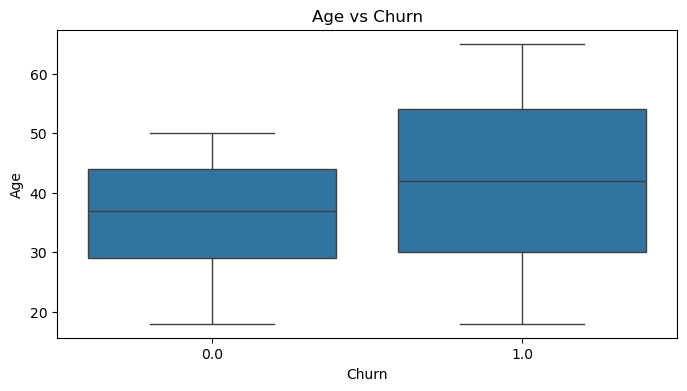

Churn
0.0    36.262973
1.0    41.747263
Name: Age, dtype: float64
Churn
0.0    37.0
1.0    42.0
Name: Age, dtype: float64 



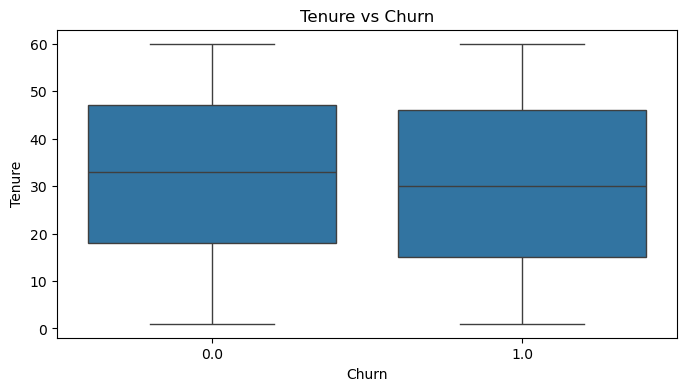

Churn
0.0    32.281754
1.0    30.473598
Name: Tenure, dtype: float64
Churn
0.0    33.0
1.0    30.0
Name: Tenure, dtype: float64 



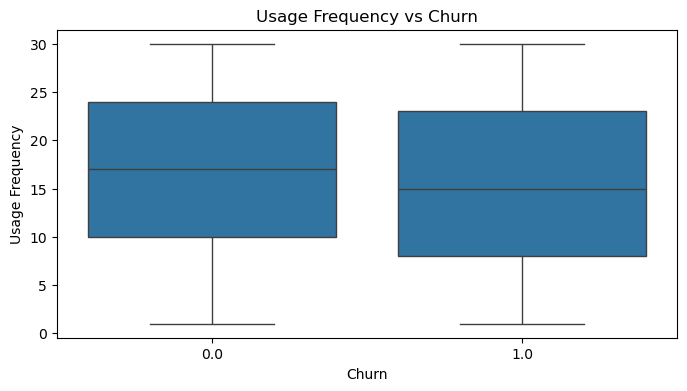

Churn
0.0    16.260552
1.0    15.461658
Name: Usage Frequency, dtype: float64
Churn
0.0    17.0
1.0    15.0
Name: Usage Frequency, dtype: float64 



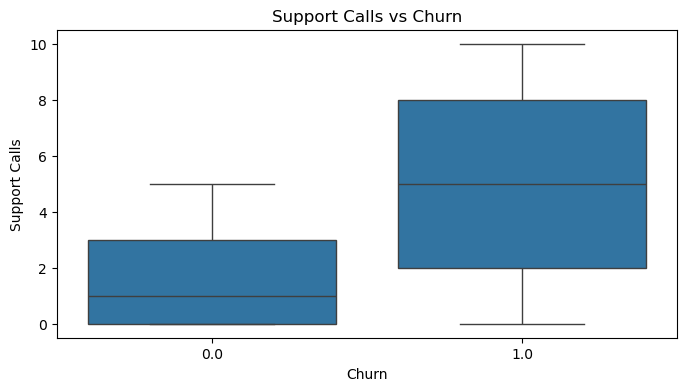

Churn
0.0    1.586418
1.0    5.144861
Name: Support Calls, dtype: float64
Churn
0.0    1.0
1.0    5.0
Name: Support Calls, dtype: float64 



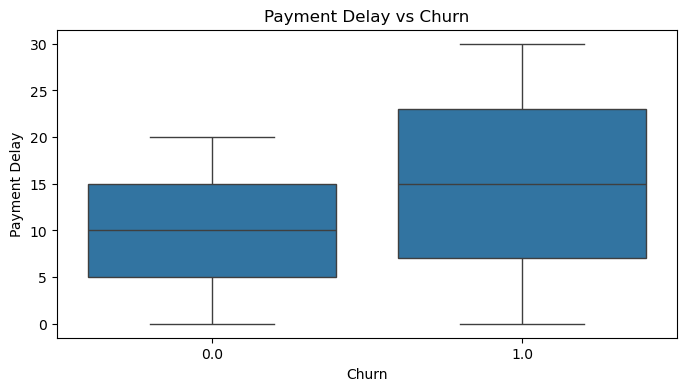

Churn
0.0    10.015500
1.0    15.217729
Name: Payment Delay, dtype: float64
Churn
0.0    10.0
1.0    15.0
Name: Payment Delay, dtype: float64 



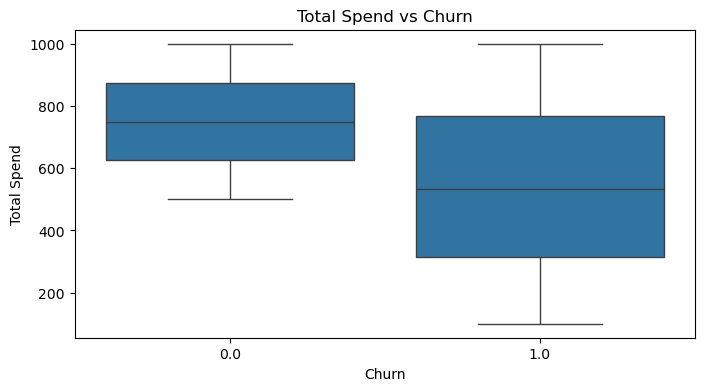

Churn
0.0    749.953111
1.0    541.285528
Name: Total Spend, dtype: float64
Churn
0.0    749.98
1.0    534.00
Name: Total Spend, dtype: float64 



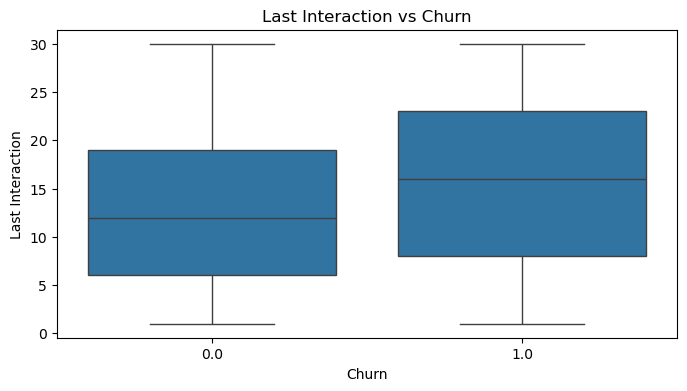

Churn
0.0    13.008804
1.0    15.604546
Name: Last Interaction, dtype: float64
Churn
0.0    12.0
1.0    16.0
Name: Last Interaction, dtype: float64 



In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
                  'Payment Delay', 'Total Spend', 'Last Interaction']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=train_df)  # Churn on x-axis
    plt.title(f'{col} vs Churn')
    plt.show()
    
    print(train_df.groupby('Churn')[col].mean())
    print(train_df.groupby('Churn')[col].median(), '\n')



Churn rate by Gender:
 Gender
Female    0.666691
Male      0.491269
Name: Churn, dtype: float64


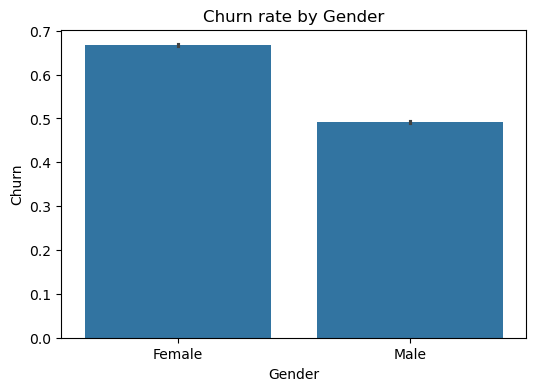


Churn rate by Subscription Type:
 Subscription Type
Basic       0.581782
Premium     0.559417
Standard    0.560700
Name: Churn, dtype: float64


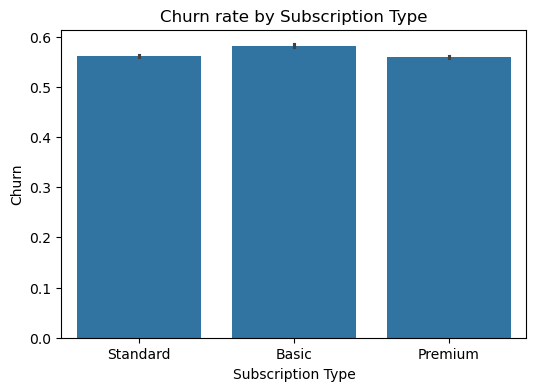


Churn rate by Contract Length:
 Contract Length
Annual       0.460761
Monthly      1.000000
Quarterly    0.460256
Name: Churn, dtype: float64


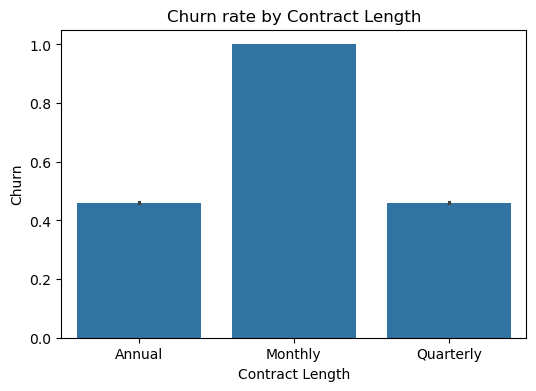

In [15]:
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']

for col in categorical_cols:
    churn_rate = train_df.groupby(col)['Churn'].mean()
    print(f'\nChurn rate by {col}:\n', churn_rate)
    
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y='Churn', data=train_df)
    plt.title(f'Churn rate by {col}')
    plt.show()

In [16]:
train_df['Contract Length'].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

# Feature Engineering & Preprocessing

In [17]:
# Binary encoding
train_df['Gender'] = train_df['Gender'].map({'Female': 1, 'Male': 0})

In [18]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Create encoders
le_subscription = LabelEncoder()
le_contract = LabelEncoder()

# Fit on TRAIN only
train_df['Subscription Type'] = le_subscription.fit_transform(train_df['Subscription Type'])
train_df['Contract Length'] = le_contract.fit_transform(train_df['Contract Length'])


In [19]:
train_df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,1,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,1,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,1,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,0,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,0,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


In [20]:
print("Subscription Type mapping:")
print(dict(zip(le_subscription.classes_, le_subscription.transform(le_subscription.classes_))))

print("\nContract Length mapping:")
print(dict(zip(le_contract.classes_, le_contract.transform(le_contract.classes_))))

Subscription Type mapping:
{'Basic': np.int64(0), 'Premium': np.int64(1), 'Standard': np.int64(2)}

Contract Length mapping:
{'Annual': np.int64(0), 'Monthly': np.int64(1), 'Quarterly': np.int64(2)}


In [21]:
# Save Subscription Type encoder
with open("subscription_encoder.pkl", "wb") as f:
    pickle.dump(le_subscription, f)

# Save Contract Length encoder
with open("contract_length_encoder.pkl", "wb") as f:
    pickle.dump(le_contract, f)


In [22]:
categorial_features = train_df.select_dtypes(include=['category', 'object']).columns
categorial_features

Index([], dtype='object')

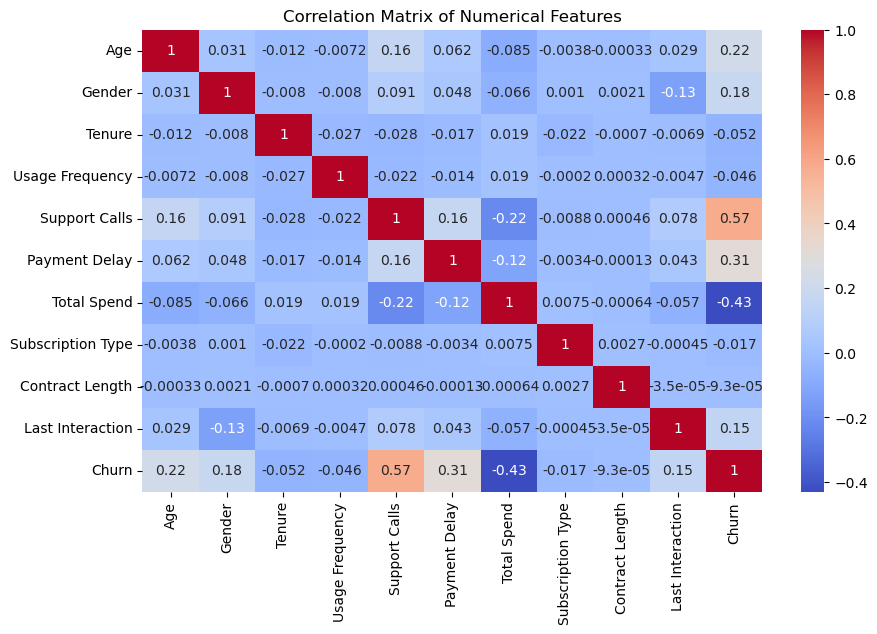

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Subscription Type', 'Contract Length',
       'Last Interaction', 'Churn']

plt.figure(figsize=(10,6))
sns.heatmap(train_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_num = train_df[numerical_cols]

vif_data = pd.DataFrame()
vif_data["Feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]

print(vif_data)

              Feature       VIF
0                 Age  8.944160
1              Gender  1.826570
2              Tenure  3.861033
3     Usage Frequency  3.966555
4       Support Calls  3.544031
5       Payment Delay  3.680578
6         Total Spend  6.796672
7   Subscription Type  2.440574
8     Contract Length  2.169558
9    Last Interaction  3.749477
10              Churn  4.516311


In [25]:
X = train_df.drop('Churn', axis=1)
y = train_df['Churn']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

In [27]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 352665 samples
Test set size: 88167 samples


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=100,      
    max_depth=10,           # limit depth to avoid overfitting
    min_samples_leaf=50,    # minimum samples per leaf
    random_state=42
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9941588122540179

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     38063
         1.0       1.00      0.99      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167


Confusion Matrix:
 [[38061     2]
 [  513 49591]]


In [36]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9945
Test Accuracy: 0.9942


In [38]:
import pickle

# Save the trained model
with open("rf_churn_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

In [42]:
import pandas as pd
import pickle

# Load the test data
test_df = pd.read_csv(r"C:\Users\Rehman\Churn_Project\customer_churn_dataset-testing-master.csv")

print("Original test data shape:", test_df.shape)
print("\nFirst few rows:")
print(test_df.head())

# Handle missing values (same as training)
test_df = test_df.dropna()
test_df = test_df.drop('CustomerID', axis=1)

# Load the saved encoders
with open("subscription_encoder.pkl", "rb") as f:
    le_subscription = pickle.load(f)
with open("contract_length_encoder.pkl", "rb") as f:
    le_contract = pickle.load(f)

# Load the trained model
with open("rf_churn_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

# Apply the same transformations as training
test_df['Gender'] = test_df['Gender'].map({'Female': 1, 'Male': 0})
test_df['Subscription Type'] = le_subscription.transform(test_df['Subscription Type'])
test_df['Contract Length'] = le_contract.transform(test_df['Contract Length'])

# Separate features and target (if Churn column exists)
if 'Churn' in test_df.columns:
    X_test = test_df.drop('Churn', axis=1)
    y_test = test_df['Churn']
    has_true_labels = True
else:
    X_test = test_df.copy()
    has_true_labels = False

# Make predictions
predictions = rf_model.predict(X_test)
prediction_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Add predictions to the dataframe
test_df['Predicted_Churn'] = predictions
test_df['Churn_Probability'] = prediction_probabilities

# If true labels exist, evaluate performance
if has_true_labels:
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    
    accuracy = accuracy_score(y_test, predictions)
    print(f"\n{'='*50}")
    print(f"Test Set Accuracy: {accuracy:.4f}")
    print(f"{'='*50}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    
    # Show comparison
    comparison_df = test_df[['Churn', 'Predicted_Churn', 'Churn_Probability']].copy()
    comparison_df['Match'] = (comparison_df['Churn'] == comparison_df['Predicted_Churn'])
    print(f"\nPrediction Summary:")
    print(f"Correct predictions: {comparison_df['Match'].sum()}")
    print(f"Incorrect predictions: {(~comparison_df['Match']).sum()}")
    print(f"\nSample predictions:")
    print(comparison_df.head(10))
else:
    print("\n✓ Predictions completed!")
    print(f"\nPrediction Summary:")
    print(f"Total predictions: {len(predictions)}")
    print(f"Predicted Churn: {predictions.sum()}")
    print(f"Predicted No Churn: {len(predictions) - predictions.sum()}")

# Save results to a new CSV file
output_file = r"C:\Users\Rehman\Churn_Project\test_predictions.csv"
test_df.to_csv(output_file, index=False)
print(f"\n✓ Predictions saved to: {output_file}")

# Display first few predictions
print("\nFirst 10 predictions:")
display_cols = ['Churn', 'Predicted_Churn', 'Churn_Probability'] if has_true_labels else ['Predicted_Churn', 'Churn_Probability']
print(test_df[display_cols].head(10))

Original test data shape: (64374, 12)

First few rows:
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3    